<a href="https://colab.research.google.com/github/ubuntupunk/ocr-dev/blob/main/Llama_3_2_OCR_Together_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip -q install --upgrade together

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 22.2 MB/s eta 0:00:00


In [ ]:
import together
import os
from google.colab import userdata

# set your API key
os.environ["TOGETHER_API_KEY"] = userdata.get('TOGETHER_API_KEY')

# list available models and descriptons
models = together.Models.list()

<ipython-input-2-b00b997550e1>:9: DeprecationWarning: Call to deprecated function list.
  models = together.Models.list()


In [ ]:
from PIL import Image
from IPython.display import Markdown, display

display(Markdown("## Llama 3.2 OCR"))

## Llama 3.2 OCR

In [ ]:
models = together.Models.list()

<ipython-input-3-7118bf3c7eff>:1: DeprecationWarning: Call to deprecated function list.
  models = together.Models.list()


In [ ]:
for model in models:
    if "Vision" in model['id'] :
        print(model['id'])
        # print(model['pricing'])


meta-llama/Llama-Guard-3-11B-Vision-Turbo
meta-llama/Llama-3.2-11B-Vision-Instruct-Turbo
meta-llama/Llama-Vision-Free
meta-llama/Llama-3.2-90B-Vision-Instruct-Turbo
SG161222/Realistic_Vision_V3.0_VAE


In [ ]:
model = "meta-llama/Llama-3.2-90B-Vision-Instruct-Turbo"

## Using with WebURLs

In [ ]:
from together import Together

client = Together()

getDescriptionPrompt = "You are a UX/UI designer. Describe the attached screenshot or UI mockup in detail. I will feed in the output you give me to a coding model that will attempt to recreate this mockup, so please think step by step and describe the UI in detail. Pay close attention to background color, text color, font size, font family, padding, margin, border, etc. Match the colors and sizes exactly. Make sure to mention every part of the screenshot including any headers, footers, etc. Use the exact text from the screenshot."

imageUrl = "https://techcrunch.com/wp-content/uploads/2024/11/Screenshot-2024-11-14-at-4.28.53PM-e1731619815936.png?w=535"

stream = client.chat.completions.create(
    model="meta-llama/Llama-3.2-11B-Vision-Instruct-Turbo",
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": getDescriptionPrompt},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": imageUrl,
                    },
                },
            ],
        }
    ],
    stream=True,
)

# Safer way to handle streaming chunks
try:
    for chunk in stream:
        if hasattr(chunk, 'choices') and chunk.choices:
            if hasattr(chunk.choices[0], 'delta'):
                if hasattr(chunk.choices[0].delta, 'content'):
                    content = chunk.choices[0].delta.content
                    if content is not None:
                        print(content, end="", flush=True)
except Exception as e:
    print(f"\nAn error occurred: {str(e)}")

* The header features a white rectangle with a black border, containing the text "Welcome to your Thrive AI Coach" in a bold, black font. Below this, a smaller gray text reads, "It looks like there's nothing here yet. Start exploring our features to track your health journey, log your activities, and get personalized insights. We're here to help you thrive every step of the way!"
* The header is set against a white background, with a subtle gray gradient effect.

**Main Content Area**

* The main content area is divided into two sections: a list of questions and a set of buttons.
* The list of questions is presented in a white box with a gray border, containing four question prompts:
	+ "Can you provide a summary of my daily activity?"
	+ "What were my heart rate over the last week?"
	+ "Can you analyze my sleep patterns?"
	+ "Create me a workout based on my fitness goals and activity data"
* Each question prompt is accompanied by a small icon to the left, such as a clipboard, heart ra

## Local Images

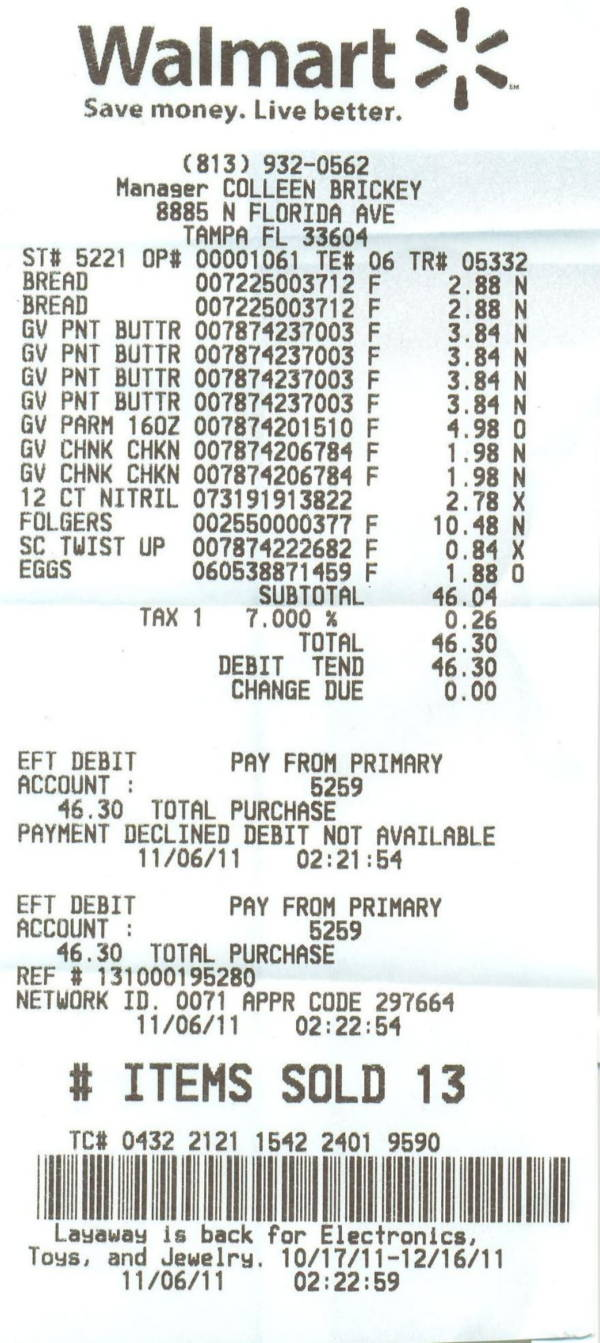

In [ ]:
img_path = "/content/receipt.png"

image = Image.open(img_path).convert("RGB")
image

In [ ]:
from together import Together
import base64

client = Together()

getDescriptionPrompt = "what is in the image"

imagePath = "/content/receipt.jpeg"

def encode_image(image_path):
        with open(image_path, "rb") as image_file:
            return base64.b64encode(image_file.read()).decode('utf-8')

try:
    base64_image = encode_image(imagePath)

    stream = client.chat.completions.create(
        model="meta-llama/Llama-3.2-11B-Vision-Instruct-Turbo",
        messages=[
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": getDescriptionPrompt},
                    {
                        "type": "image_url",
                        "image_url": {
                            "url": f"data:image/jpeg;base64,{base64_image}"
                        },
                    },
                ],
            }
        ],
        stream=True,
    )

    # Improved stream handling with proper checks
    for chunk in stream:
        # Check if chunk has choices
        if not hasattr(chunk, 'choices') or not chunk.choices:
            continue

        # Check if first choice exists and has delta
        choice = chunk.choices[0]
        if not hasattr(choice, 'delta'):
            continue

        # Check if delta has content
        delta = choice.delta
        if not hasattr(delta, 'content'):
            continue

        # Print content if it exists
        content = delta.content
        if content is not None:
            print(content, end="", flush=True)

except FileNotFoundError:
    print(f"Error: Could not find image file at {imagePath}")
except Exception as e:
    print(f"An error occurred: {str(e)}")

**Receipt Details**

The image displays a Walmart receipt from November 6, 2011. The receipt is for a total purchase of $46.30, with the payment method being EFT Debit.

**Store Information**

* Store Name: Walmart
* Store Address: 8885 N Florida Ave, Tampa FL 33604
* Manager's Name: Colleen Brickey

**Items Purchased**

The receipt lists the following items:

* Bread (2 items)
* GV PNT BUTTR (4 items)
* GV PARM (1 item)
* GV CHNK CHKN (2 items)
* FOLGERS (1 item)
* SC TWIST UP (1 item)
* EGGS (1 item)

**Subtotal and Taxes**

* Subtotal: $46.04
* Tax 1: $0.26
* Total: $46.30

**Debit Information**

* EFT Debit Account: 5259
* Payment Declined Debit Not Available: 11/06/11
* Time: 02:21:54

**Payment Details**

* EFT Debit Account: 5259
* Pay From Primary: 5259
* Total Purchase: $46.30
* Ref #: 131000195280
* Network ID: 0071
* Appr Code: 297664
* Date: 11/06/11
* Time: 02:22:54

**Bar Code**

The receipt includes a bar code at the bottom, which reads "TC# 0432 2121 1542 2401 9590".

*

## My Edited Version

In [ ]:
from together import Together
import base64
import os
import imghdr

class ImageProcessor:
    def __init__(self):
        self.client = Together()
        self.prompt = "What is this?"
        self.model = "meta-llama/Llama-3.2-11B-Vision-Instruct-Turbo"

    def get_mime_type(self, image_path):
        """Determine MIME type based on actual image format using imghdr"""
        img_type = imghdr.what(image_path)
        if img_type:
            return f'image/{img_type}'
        # Fallback to extension-based detection
        extension = os.path.splitext(image_path)[1].lower()
        mime_types = {
            '.png': 'image/png',
            '.jpg': 'image/jpeg',
            '.jpeg': 'image/jpeg',
            '.gif': 'image/gif',
            '.webp': 'image/webp'
        }
        return mime_types.get(extension, 'image/jpeg')

    def encode_image(self, image_path):
        """Encode image to base64 with error handling"""
        if not os.path.exists(image_path):
            raise FileNotFoundError(f"Image file not found: {image_path}")

        try:
            with open(image_path, "rb") as image_file:
                return base64.b64encode(image_file.read()).decode('utf-8')
        except Exception as e:
            raise Exception(f"Error encoding image: {str(e)}")

    def analyze_image(self, image_path):
        """Analyze image using Together API with proper error handling"""
        try:
            # Encode image and get MIME type
            base64_image = self.encode_image(image_path)
            mime_type = self.get_mime_type(image_path)

            # Create API request
            stream = self.client.chat.completions.create(
                model=self.model,
                messages=[
                    {
                        "role": "user",
                        "content": [
                            {"type": "text", "text": self.prompt},
                            {
                                "type": "image_url",
                                "image_url": {
                                    "url": f"data:{mime_type};base64,{base64_image}"
                                },
                            },
                        ],
                    }
                ],
                stream=True,
            )

            # Process streaming response
            response_text = ""
            for chunk in stream:
                if hasattr(chunk, 'choices') and chunk.choices:
                    if hasattr(chunk.choices[0], 'delta'):
                        if hasattr(chunk.choices[0].delta, 'content'):
                            content = chunk.choices[0].delta.content
                            if content is not None:
                                print(content, end="", flush=True)
                                response_text += content

            return response_text

        except FileNotFoundError as e:
            print(f"File Error: {str(e)}")
            raise
        except Exception as e:
            print(f"Error during image analysis: {str(e)}")
            raise

In [ ]:
# Example usage
processor = ImageProcessor()
processor.prompt = "What is in the image?"


processor.prompt

'What is in the image?'

In [ ]:
SYSTEM_PROMPT = """Convert the provided image into Markdown format. Ensure that all content from the page is included, such as headers, footers, subtexts, images (with alt text if possible), tables, and any other elements.

  Requirements:

  - Output Only Markdown: Return solely the Markdown content without any additional explanations or comments.
  - No Delimiters: Do not use code fences or delimiters like \`\`\`markdown.
  - Complete Content: Do not omit any part of the page, including headers, footers, and subtext.
  """

In [ ]:
processor.prompt = SYSTEM_PROMPT

In [ ]:
try:
    # Example with different image types
    image_paths = [
        "/content/receipt.png",
        "/content/photo.jpg",
        # "/content/image.webp"
    ]

    for image_path in image_paths:
        print(f"\nAnalyzing {image_path}...")
        processor.analyze_image(
            image_path
        )

except Exception as e:
    print(f"An error occurred: {str(e)}")


Analyzing /content/receipt.png...
**Walmart Receipt**

**Header**
----------

*   **Walmart Logo**: A stylized starburst design with the text "Walmart" in gray, accompanied by the tagline "Save money. Live better." in smaller gray text below.
*   **Contact Information**:
    *   **Phone Number**: (813) 932-0562
    *   **Store Address**: 8885 N Florida Ave, Tampa, FL 33604

**Transaction Details**
----------------------

*   **Manager's Name**: Colleen Brickey
*   **Store Number**: 5221
*   **Operation Number**: 00001061
*   **Transaction Number**: 06
*   **Transaction Time**: 02:21:54 on November 6, 2011
*   **Tax Rate**: 7.000%
*   **Total**: $46.30
*   **Debit/Tend**: $46.30
*   **Change Due**: $0.00

**Items Sold**
--------------

| Item | Quantity | Price |
| --- | --- | --- |
| Bread | 2 | $2.88 |
| Bread | 2 | $2.88 |
| GV PNT BUTTR | 3 | $3.84 |
| GV PNT BUTTR | 3 | $3.84 |
| GV PNT BUTTR | 3 | $3.84 |
| GV PARM 16OZ | 4 | $4.98 |
| GV CHNK CHKN | 1 | $1.98 |
| GV CHNK CHKN | 

In [ ]:

processor = ImageProcessor()
processor.prompt = SYSTEM_PROMPT
processor.model = "meta-llama/Llama-3.2-90B-Vision-Instruct-Turbo"

In [ ]:
try:
    # Example with different image types
    image_paths = [
        "/content/receipt.png",
        "/content/photo.jpg",
        # "/content/image.webp"
    ]

    for image_path in image_paths:
        print(f"\nAnalyzing {image_path}...")
        processor.analyze_image(
            image_path
        )

except Exception as e:
    print(f"An error occurred: {str(e)}")


Analyzing /content/receipt.png...
# Walmart Receipt

## Header Section

* Store Name: Walmart
* Logo: Walmart logo
* Tagline: Save money. Live better.
* Phone Number: (813) 932-0562
* Store Address: 8885 N Florida Ave, Tampa FL 33604
* Manager's Name: Colleen Brickey
* Manager's Phone Number: (813) 932-0562
* Store Number: 5221
* Operation Number: 00001061
* Terminal Number: 06
* Transaction Number: 05332

## Itemized List

* BREAD: 2.88
* BREAD: 2.88
* GV PNT BUTTR: 3.84
* GV PNT BUTTR: 3.84
* GV PNT BUTTR: 3.84
* GV PARM 16OZ: 4.98
* GV CHNK CHKN: 1.98
* GV CHNK CHKN: 1.98
* 12 CT NITRIL: 2.78
* FOLGERS: 10.48
* SC TWIST UP: 0.84
* EGGS: 1.88

## Subtotal, Tax, and Total

* Subtotal: 46.04
* Tax: 7.000%
* Total: 46.30

## Payment Information

* EFT Debit Account: 5259
* Pay From Primary: 5259
* Payment Declined Debit Not Available: 11/06/11 02:21:54
* EFT Debit Account: 5259
* Pay From Primary: 5259
* Ref # 131000195280
* Network ID: 0071
* Appr Code: 297664
* Date: 11/06/11 02:22:5

In [ ]:
try:
    # Example with different image types
    image_paths = [
        "/content/sam-patreon.webp",
    ]

    for image_path in image_paths:
        print(f"\nAnalyzing {image_path}...")
        processor.analyze_image(
            image_path
        )

except Exception as e:
    print(f"An error occurred: {str(e)}")


Analyzing /content/sam-patreon.webp...
# Hi there everyone!

Here is the link to Sam's Patreon

https://www.patreon.com/SamWitteveen

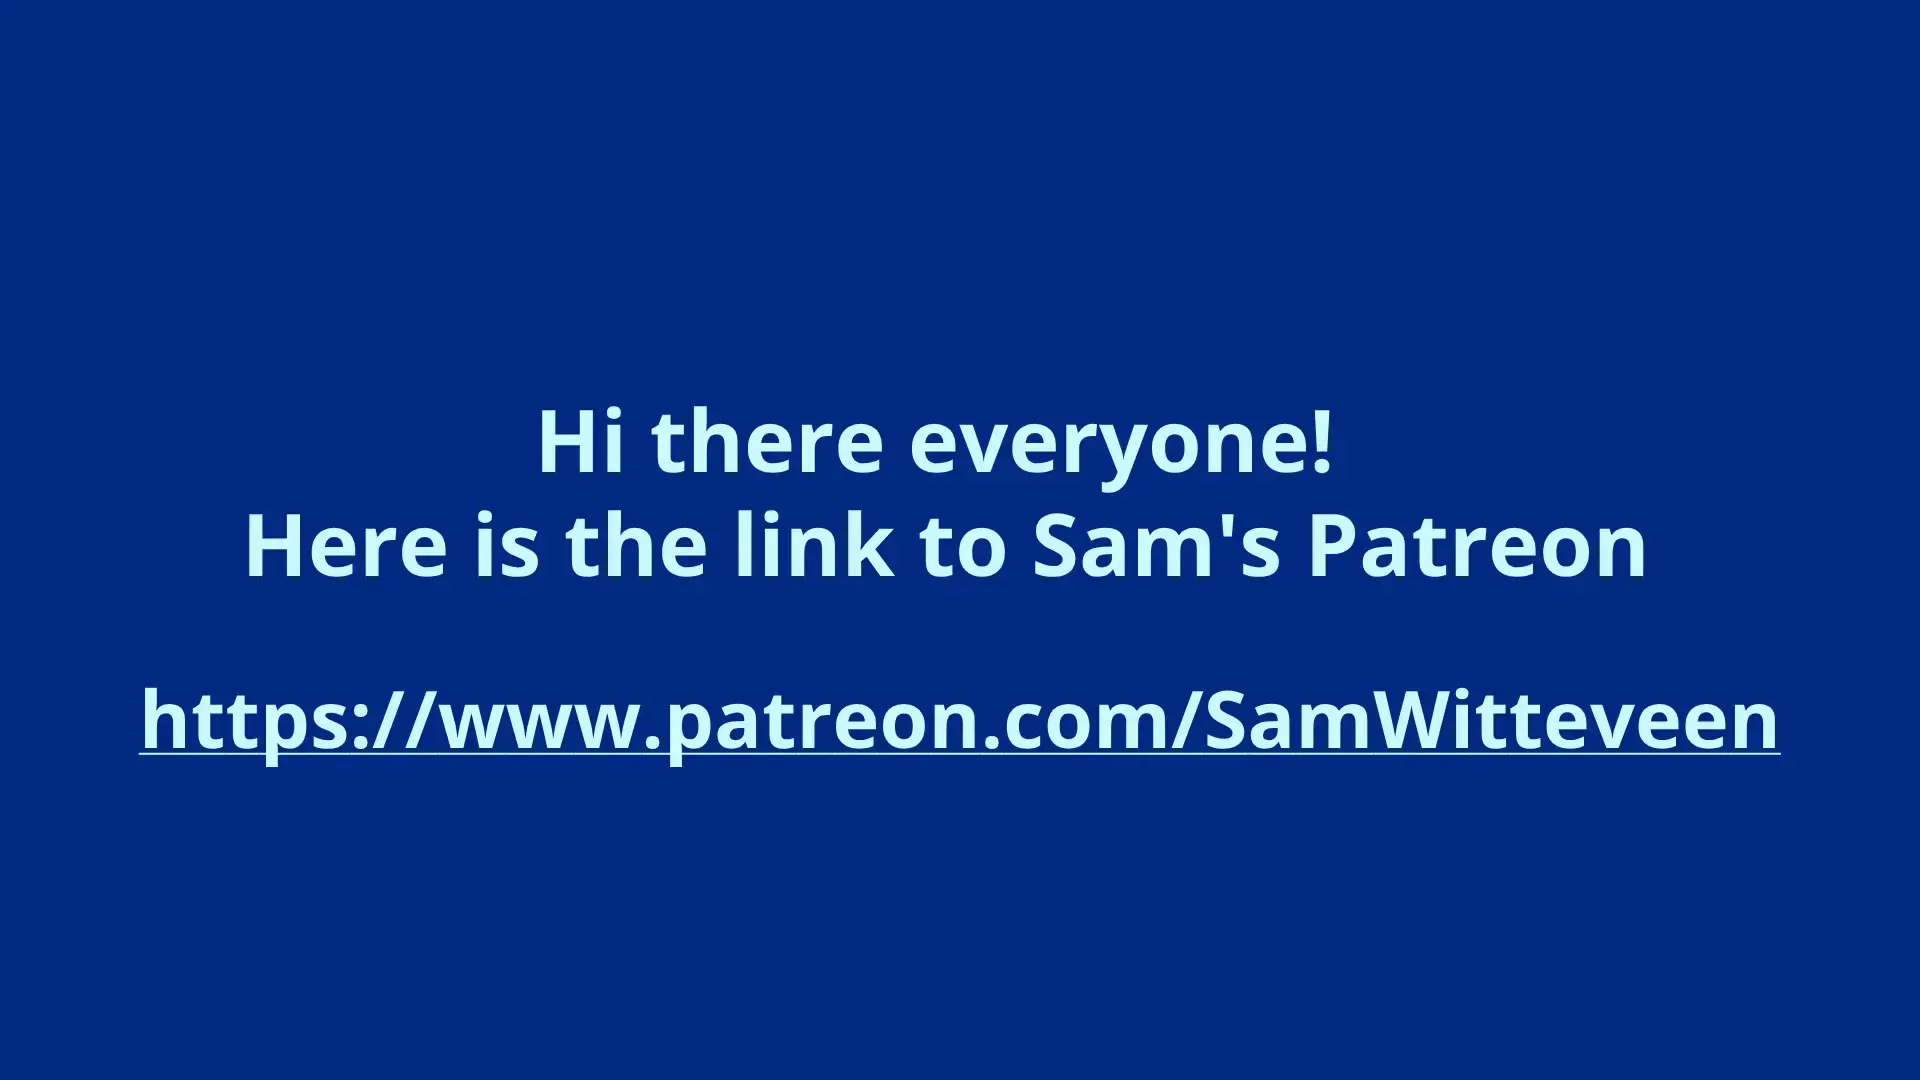

In [ ]:
img_path = "/content/sam-patreon.webp"

image = Image.open(img_path).convert("RGB")
image

## Original Javascript Version

In [ ]:
import os
import base64
from typing import Optional, Literal
from together import Together

def encode_image(image_path: str) -> str:
    """Read and encode image to base64."""
    with open(image_path, 'rb') as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

def is_remote_file(file_path: str) -> bool:
    """Check if the file path is a remote URL."""
    return file_path.startswith(('http://', 'https://'))

async def get_markdown(
    together: Together,
    vision_llm: str,
    file_path: str
) -> str:
    """Process image and convert to markdown using Together AI."""
    system_prompt = """Convert the provided image into Markdown format. Ensure that all content from the page is included, such as headers, footers, subtexts, images (with alt text if possible), tables, and any other elements.
    Requirements:
    - Output Only Markdown: Return solely the Markdown content without any additional explanations or comments.
    - No Delimiters: Do not use code fences or delimiters like ```markdown.
    - Complete Content: Do not omit any part of the page, including headers, footers, and subtext.
    """

    final_image_url = file_path if is_remote_file(file_path) else f"data:image/jpeg;base64,{encode_image(file_path)}"

    output = await together.chat.completions.create(
        model=vision_llm,
        messages=[
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": system_prompt},
                    {
                        "type": "image_url",
                        "image_url": {
                            "url": final_image_url
                        }
                    }
                ]
            }
        ]
    )

    return output.choices[0].message.content

async def ocr(
    file_path: str,
    api_key: Optional[str] = None,
    model: Literal["Llama-3.2-90B-Vision", "Llama-3.2-11B-Vision", "free"] = "Llama-3.2-90B-Vision"
) -> str:
    """
    Perform OCR on an image using Together AI.

    Args:
        file_path: Path to the image file or URL
        api_key: Together AI API key (defaults to TOGETHER_API_KEY environment variable)
        model: Model to use for vision processing

    Returns:
        Markdown formatted text from the image
    """
    if api_key is None:
        api_key = os.getenv('TOGETHER_API_KEY')
        if api_key is None:
            raise ValueError("API key must be provided either directly or through TOGETHER_API_KEY environment variable")

    vision_llm = f"meta-llama/{model}-Instruct-Turbo" if model != "free" else "meta-llama/Llama-Vision-Free"

    together = Together(api_key=api_key)
    final_markdown = await get_markdown(together, vision_llm, file_path)

    return final_markdown

## Pricing for together Image tokens

For vision models images are converted to 1,601 to 6,404 tokens depending on image size. Together currently use this formula to calculate the number of tokens in an image:

(T= tokens, H=height, W=width)

In [ ]:
T = min(2, max(H // 560, 1)) * min(2, max(W // 560, 1)) * 1601